<a href="https://colab.research.google.com/github/PrazaKembaren/Fisika-Bintang-Tugas-1/blob/main/%5BAK_4121%5D_Fisika_Bintang_Tugas_Plot_CMD_dan_Isokron_Gugus_Bintang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Fisika Bintang : Plot CMD dan Isokron Gugus Bintang

#Preproses Pengolahan Data

In [15]:
from matplotlib import rcParams

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Membaca dan Pengolahan Data

###Membaca Data CMD Isokron

In [3]:
# Unpack file data.
dat_file = np.loadtxt('/content/drive/MyDrive/dataM67.dat', unpack=True)

In [4]:
type(dat_file)

numpy.ndarray

In [5]:
dat_file

array([[ 0.66   ,  0.66   ,  0.66   , ...,  0.82   ,  0.82   ,  0.82   ],
       [ 0.69525,  0.69525,  0.69525, ...,  0.69525,  0.69525,  0.69525],
       [ 8.909  ,  8.909  ,  8.909  , ..., 10.309  , 10.309  , 10.309  ],
       ...,
       [10.78   , 10.255  , 10.13   , ..., -0.765  , -0.755  , 30.037  ],
       [10.2    ,  9.678  ,  9.554  , ..., -4.11   , -4.107  , 30.04   ],
       [ 9.847  ,  9.321  ,  9.197  , ..., -6.399  , -6.401  , 30.061  ]])

###Definisi Parameter dari setiap kolom dalam data

In [6]:
Vm = dat_file[-6][:]
#for i in Vmag:
 # Vmag = Vmag + 14.33
 # Vm.append(Vmag)
Bm = dat_file[-7][:]
Um = dat_file[-8][:]
zini = dat_file[0][:]
logL = dat_file[6]
logT = dat_file[7]
logAge = dat_file[2]

###Membaca Data WEBDA M67

In [7]:
 data = pd.read_csv('/content/drive/MyDrive/ubv.peo',sep='\t+',skiprows=[1], header=0)

<ipython-input-7-825a467e3d7d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/drive/MyDrive/aps20_praz31/Semester 7/AK4121 : Physics of Star/Tugas/ubv.peo',sep='\t+',skiprows=[1], header=0)


###Data Bintang Penyusun M67

In [ ]:
BS = pd.read_csv('/content/drive/MyDrive/BS',sep='\t+',skiprows=[1], header=0)
BS = pd.DataFrame(BS)

Am = pd.read_csv('/content/drive/MyDrive/Am',sep='\t+',skiprows=[1], header=0)
Am = pd.DataFrame(Am)

SB = pd.read_csv('/content/drive/MyDrive/SB',sep='\t+',skiprows=[1], header=0)
SB = pd.DataFrame(SB)

gK = pd.read_csv('/content/drive/MyDrive/gK',sep='\t+',skiprows=[1], header=0)
gK = pd.DataFrame(gK)

NM = pd.read_csv('/content/drive/MyDrive/NM',sep='\t+',skiprows=[1], header=0)
NM = pd.DataFrame(NM)

###Menampilkan Data

In [11]:
data = pd.DataFrame(data)
data

,No,Ref,V,BV,UB,N
0,1,1367,13.59,0.57,0.06,2.0
1,3,1367,12.89,0.54,0.08,2.0
2,4,1367,12.77,0.95,0.69,1.0
3,5,1367,13.05,0.60,0.07,1.0
4,6,1367,12.82,0.55,0.03,1.0
...,...,...,...,...,...,...
718,8983,1367,14.39,0.64,0.16,1.0
719,8993,1367,15.65,0.60,-0.02,2.0
720,8996,1367,15.04,0.60,0.10,3.0
721,9015,1367,12.56,0.61,0.03,1.0


In [10]:
noBS = BS['No'].tolist()
BS = data[data["No"].isin(noBS)]

noAm = Am['No'].tolist()
Am = data[data["No"].isin(noAm)]

noSB = SB['No'].tolist()
SB = data[data["No"].isin(noSB)]

nogK = gK['No'].tolist()
gK = data[data["No"].isin(nogK)]

noNM = NM['No'].tolist()
NM = data[data["No"].isin(noNM)]

###Memilih referensi dengan data terbanyak

In [12]:
datano = data[data["Ref"]!=1367]

In [13]:
V  = datano["V"]
BV = datano["BV"]
UB = datano["UB"]
B  = datano["BV"] + datano['V']

In [14]:
ref361 = data[data["Ref"]==1367]

V_361 = ref361["V"]
BV_361 = ref361["BV"]
UB_361 = ref361["UB"]

#Plotting

In [16]:
rcParams['axes.titlesize'] = 20
rcParams['axes.titlepad'] = 10
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

###Plotting Diagram HR M67

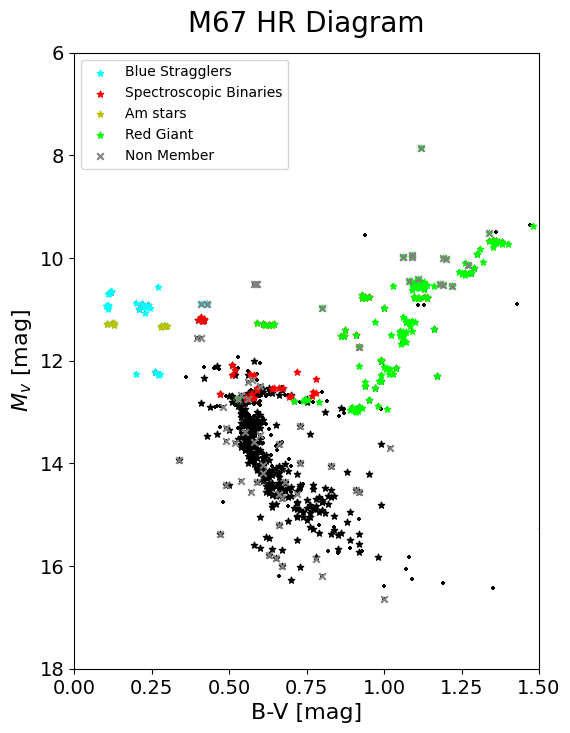

In [21]:
plt.figure(figsize=(6,8))
plt.scatter(BV, V, s=8, color='k', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")

plt.title("M67 HR Diagram", pad=15)
plt.xlabel("B-V [mag]")
plt.ylabel(r"$M_v$ [mag]")
plt.xlim(0, 1.5)
plt.ylim(6, 18)
plt.scatter(logT, logL, s=8, color='green', marker="+")
plt.gca().invert_yaxis()
plt.legend()

plt.savefig("M67HR.png", dpi=500)

###Plotting Model Isokron M67

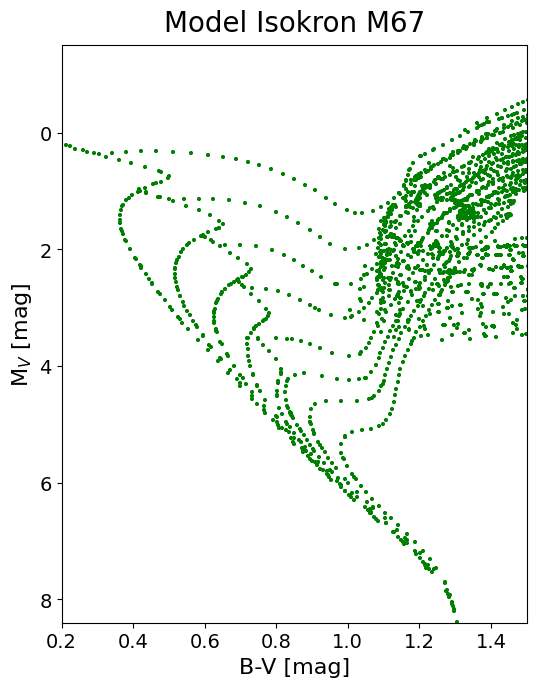

In [27]:
plt.figure(figsize=(6, 7.5))
plt.scatter(Bm-Vm, Vm, s=8, color='green', marker="+")
plt.ylim(-1.5, 8.4)
plt.xlim(0.2, 1.5)
plt.xlabel(r'B-V [mag]')
plt.ylabel(r'M$_V$ [mag]')
plt.title("Model Isokron M67")
plt.gca().invert_yaxis()
plt.savefig('modelisokronM67.png', dpi=500)

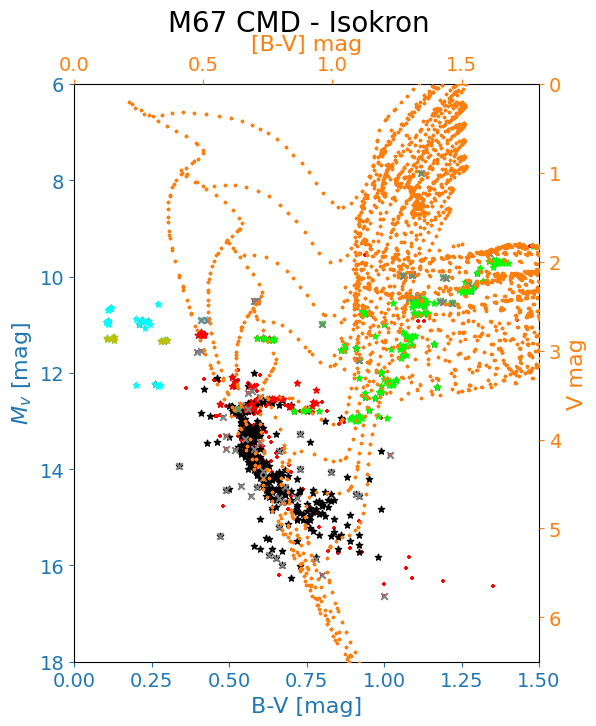

In [31]:
x_values1=BV
y_values1=V

x_values2=Bm
y_values2=Vm

fig=plt.figure(figsize=(6,7.5))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

plt.suptitle("M67 CMD - Isokron", fontsize=20)
ax.scatter(BV, V, s=8, color='r', marker="+")
ax.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
#ax.set_suptitle("M21 HR Diagram")
ax.set_xlabel("B-V [mag]", color="C0")
ax.set_ylabel(r"$M_v$ [mag]", color="C0")
ax.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
ax.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
ax.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
ax.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
ax.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
ax.set_xlim(0, 1.5)
ax.set_ylim(6, 18)
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.invert_yaxis()

ax2.scatter(x_values2-y_values2, y_values2, color="C1", s=2)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylim(0, 6.5)
ax2.set_xlim(0, 1.8)
ax2.set_ylabel(r'V mag', color="C1")
ax2.set_xlabel(r'[B-V] mag', color="C1")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.invert_yaxis()

plt.savefig('diagramHRM67-isokron.png', dpi=500)

###Plot Diagram HR dan Isokron M67

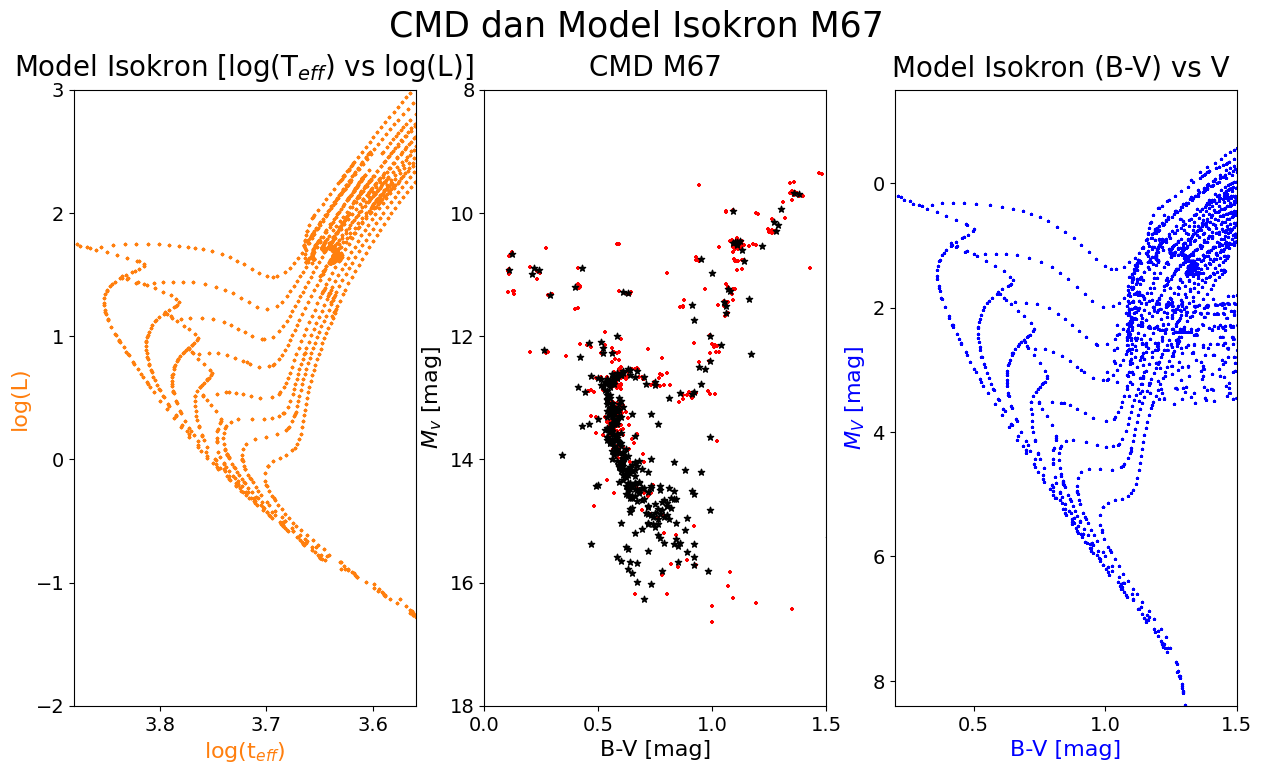

In [34]:
fig=plt.figure(figsize=(15,8))
plt.suptitle("CMD dan Model Isokron M67", fontsize=25)
plt.subplot(1,3,1)
plt.scatter(logT, logL, color="C1", s=2)
plt.ylim(-2, 3)
plt.xlim(3.56, 3.88)
plt.title(r"Model Isokron [log(T$_{eff}$) vs log(L)] ")
plt.xlabel(r'log(t$_{eff}$)', color="C1")
plt.ylabel(r'log(L)', color="C1")
plt.gca().invert_xaxis()

plt.subplot(1,3,2)
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.xlabel("B-V [mag]")
plt.ylabel(r"$M_v$ [mag]")
plt.xlim(0, 1.5)
plt.ylim(8, 18)
plt.title("CMD M67")
plt.gca().invert_yaxis()


plt.subplot(1,3,3)
plt.scatter((Bm - Vm), Vm, s=2, color='b', marker="*")
plt.title(r"Model Isokron (B-V) vs V ")
plt.ylim(-1.5, 8.4)
plt.xlim(0.2, 1.5)
plt.xlabel("B-V [mag]", color='b')
plt.ylabel(r"$M_V$ [mag]", color='b')
plt.gca().invert_yaxis()

plt.savefig('diagramHR_modelisokronM67.png', dpi=500)

In [35]:
dat_file = pd.DataFrame(dat_file)
dat_file = dat_file.T

dat_file['Vm'] = dat_file[31]
dat_file['Bm'] = dat_file[30]
dat_file['Um'] = dat_file[29]
dat_file['zini'] = dat_file[0]
dat_file['logL'] = dat_file[6]
dat_file['logT'] = dat_file[7]
dat_file['logAge'] = dat_file[2]

In [36]:
subset = dat_file[['Vm', 'Bm', 'Um', 'zini', 'logL', 'logT', 'logAge']]
subset
#data2

,Vm,Bm,Um,zini,logL,logT,logAge
0,15.659,17.634,19.286,0.66,-3.246,3.3629,8.909
1,15.127,17.088,18.722,0.66,-3.036,3.3840,8.909
2,15.002,16.962,18.596,0.66,-2.986,3.3896,8.909
3,14.768,16.724,18.353,0.66,-2.893,3.3991,8.909
4,14.415,16.362,17.978,0.66,-2.754,3.4108,8.909
...,...,...,...,...,...,...,...
14725,10.222,16.709,24.944,0.82,3.444,3.3925,10.309
14726,10.475,17.058,25.532,0.82,3.472,3.3865,10.309
14727,10.562,17.179,25.737,0.82,3.482,3.3842,10.309
14728,10.588,17.214,25.796,0.82,3.485,3.3833,10.309


In [37]:
iso1 = subset[subset['logAge'] == 8.909]
iso2 = subset[subset['logAge'] == 9.109]
iso3 = subset[subset['logAge'] == 9.309]
iso4 = subset[subset['logAge'] == 9.509]
iso5 = subset[subset['logAge'] == 9.709]
iso6 = subset[subset['logAge'] == 9.909]

zini1 = subset[subset['zini'] == 0.66]
zini2 = subset[subset['zini'] == 0.7]
zini3 = subset[subset['zini'] == 0.74]
zini4 = subset[subset['zini'] == 0.78]
zini5 = subset[subset['zini'] == 0.82]
#zini6 = subset[subset['zini'] == 0.82]

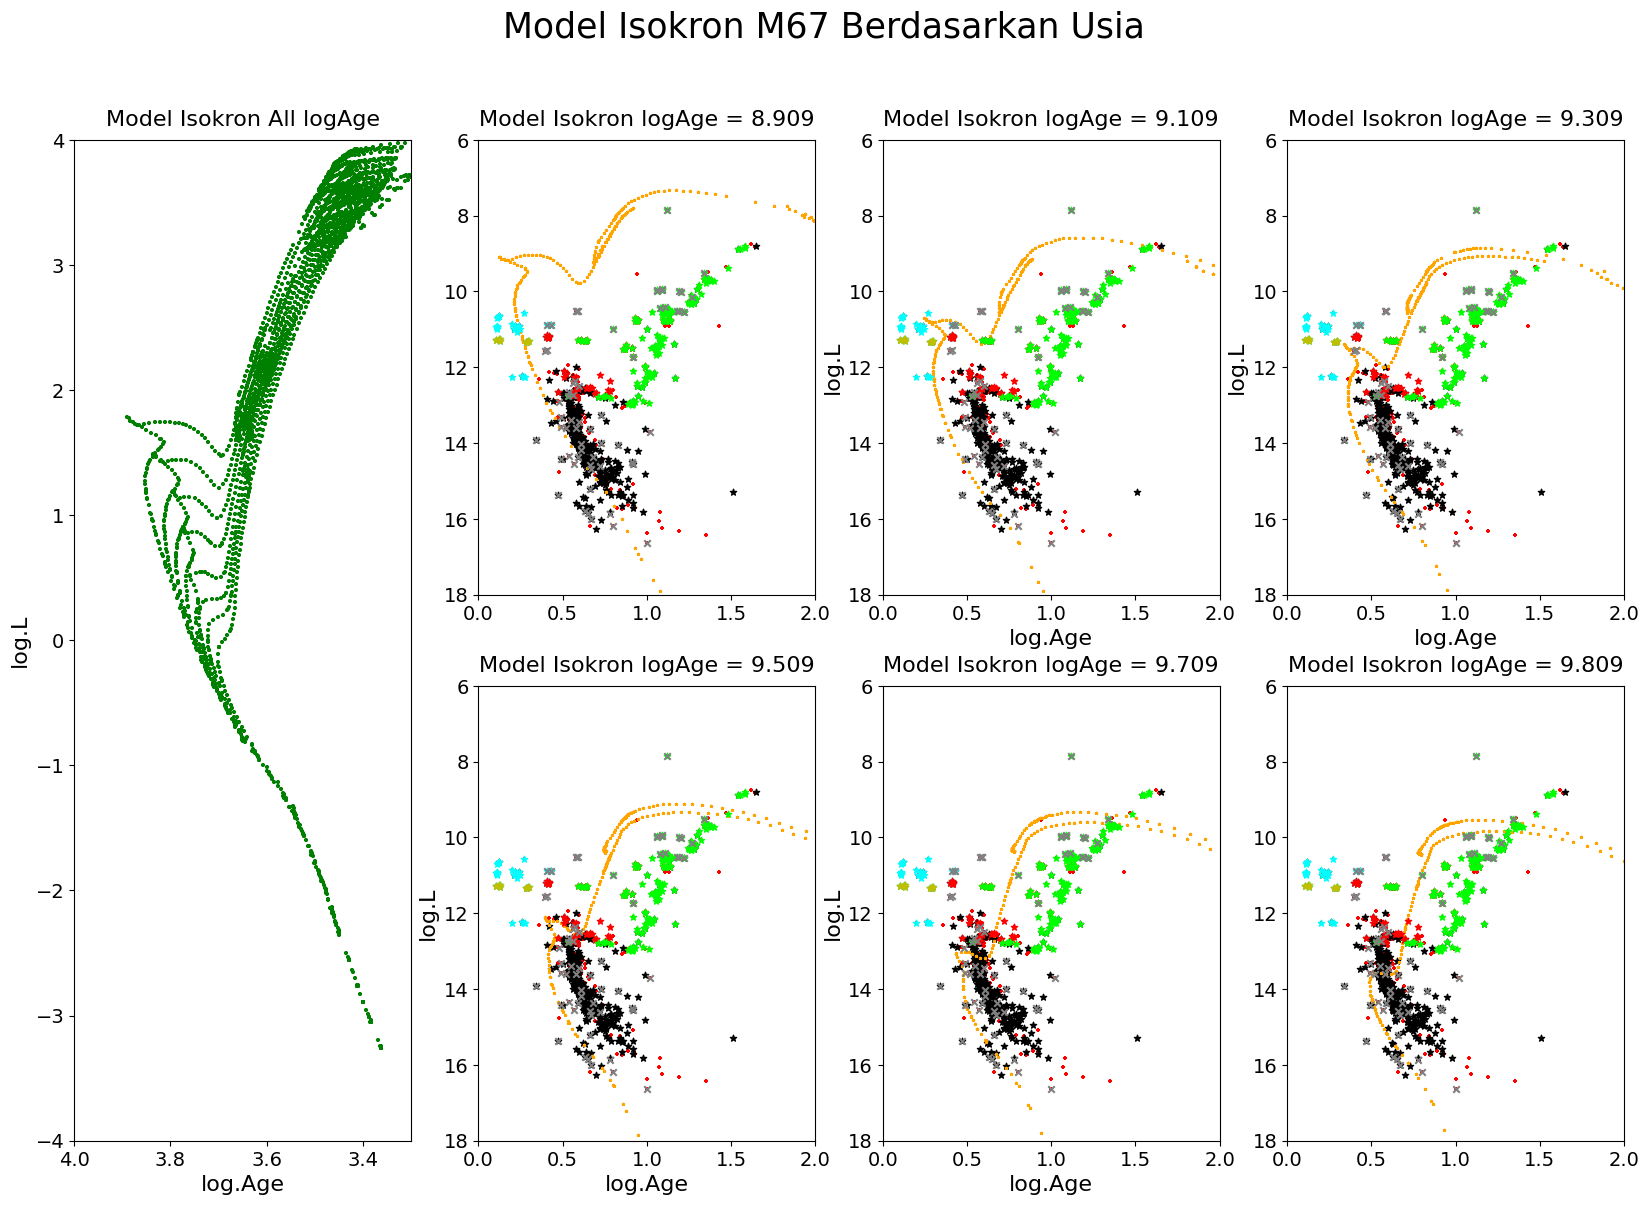

In [40]:
rcParams['axes.titlesize'] = 16

fig=plt.figure(figsize=(20,13))
plt.suptitle("Model Isokron M67 Berdasarkan Usia", fontsize=25)
plt.subplot(1,4,1)
plt.title("Model Isokron All logAge")
plt.xlabel("log.Age")
plt.ylabel("log.L")
plt.xlim(3.3, 4)
plt.ylim(-4, 4)
plt.scatter(logT, logL, s=8, color='green', marker="+")
plt.gca().invert_xaxis()

plt.subplot(2,4,2)
plt.title("Model Isokron logAge = 8.909")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso1['Bm']-iso1['Vm'], iso1['Vm']+9, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.subplot(2,4,3)
plt.title("Model Isokron logAge = 9.109")
plt.xlabel("log.Age")
plt.ylabel("log.L")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso2['Bm']-iso2['Vm'], iso2['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.subplot(2,4,4)
plt.title("Model Isokron logAge = 9.309")
plt.xlabel("log.Age")
plt.ylabel("log.L")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso3['Bm']-iso3['Vm'], iso3['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.subplot(2,4,6)
plt.title("Model Isokron logAge = 9.509")
plt.xlabel("log.Age")
plt.ylabel("log.L")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso4['Bm']-iso4['Vm'], iso4['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.subplot(2,4,7)
plt.title("Model Isokron logAge = 9.709")
plt.xlabel("log.Age")
plt.ylabel("log.L")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso5['Bm']-iso5['Vm'], iso5['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.subplot(2,4,8)
plt.title("Model Isokron logAge = 9.809")
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(iso6['Bm']-iso6['Vm'], iso6['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
#plt.scatter(iso6['zini'], iso6['Vm']+9.97, s=2, color='orange', marker="*", label="ref : 1367")
plt.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
plt.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
plt.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
plt.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
plt.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.gca().invert_yaxis()

plt.savefig('modelisokronM67pisah.png', dpi=300)

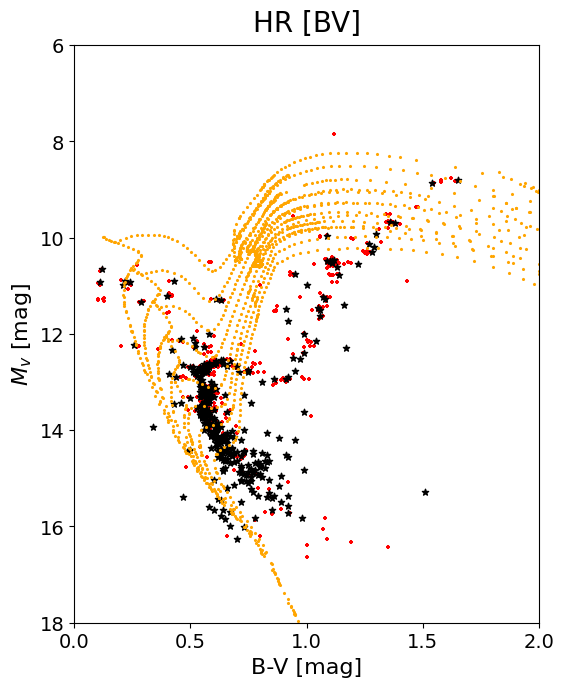

In [41]:
rcParams['axes.titlesize'] = 20

plt.figure(figsize=(6, 7.5))
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
plt.scatter(zini4['Bm']-zini4['Vm'], zini4['Vm']+9.9, s=2, color='orange', marker="*", label="ref : 1367")
plt.xlabel("B-V [mag]")
plt.ylabel(r"$M_v$ [mag]")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.title("HR [BV]")
plt.gca().invert_yaxis()

In [42]:
zini6a = zini4[zini4['logAge']==8.909]
zini6b = zini4[zini4['logAge']==9.109]
zini6c = zini4[zini4['logAge']==9.309]
zini6d = zini4[zini4['logAge']==9.509]
zini6e = zini4[zini4['logAge']==9.709]
zini6f = zini4[zini4['logAge']==9.909]

In [43]:
#zini6a = iso4[iso4['zini']==0.66]
#zini6b = iso4[iso4['zini']==0.7]
#zini6c = iso4[iso4['zini']==0.74]
#zini6d = iso4[iso4['zini']==0.78]
#zini6e = iso4[iso4['zini']==0.82]
#zini6f = iso4[iso4['zini']==0.78]

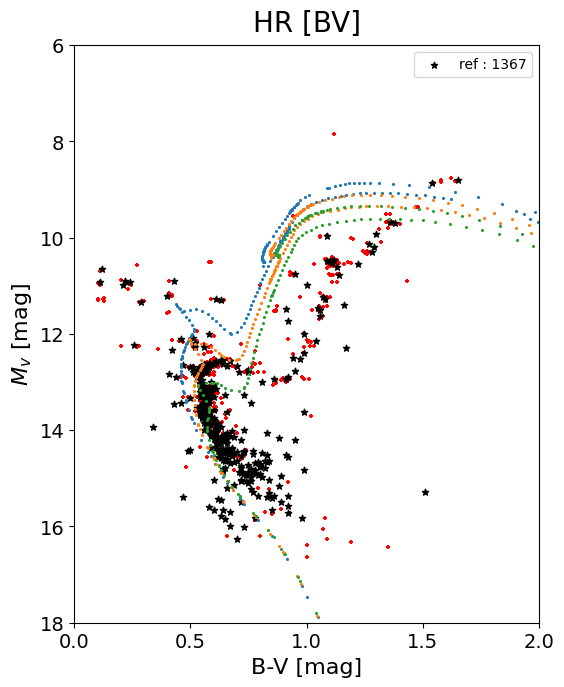

In [44]:
plt.figure(figsize=(6, 7.5))
plt.scatter(BV, V, s=8, color='r', marker="+")
plt.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
#plt.scatter((zini6a['Bm']-zini6a['Vm'])+0.1, zini6a['Vm']+9.97, s=2, marker="*")
#plt.scatter((zini6b['Bm']-zini6b['Vm'])+0.1, zini6b['Vm']+9.97, s=2,  marker="*")
plt.scatter((zini6c['Bm']-zini6c['Vm'])+0.1, zini6c['Vm']+9.97, s=2,  marker="*")
plt.scatter((zini6d['Bm']-zini6d['Vm'])+0.1, zini6d['Vm']+9.97, s=2, marker="*")
plt.scatter((zini6e['Bm']-zini6e['Vm'])+0.1, zini6e['Vm']+9.97, s=2,  marker="*")
#plt.scatter((zini6f['Bm']-zini6f['Vm'])+0.1, zini6f['Vm']+9.97, s=2,  marker="*")
#ax.set_suptitle("M21 HR Diagram")
plt.xlabel("B-V [mag]")
plt.ylabel(r"$M_v$ [mag]")
plt.xlim(0, 2)
plt.ylim(6, 18)
plt.title("HR [BV]")
plt.legend()
#plt.set_xlabel("(B-V)", color="C0")
#plt.set_ylabel("V", color="C0")
#plt.tick_params(axis='x', colors="C0")
#plt.tick_params(axis='y', colors="C0")
plt.gca().invert_yaxis()

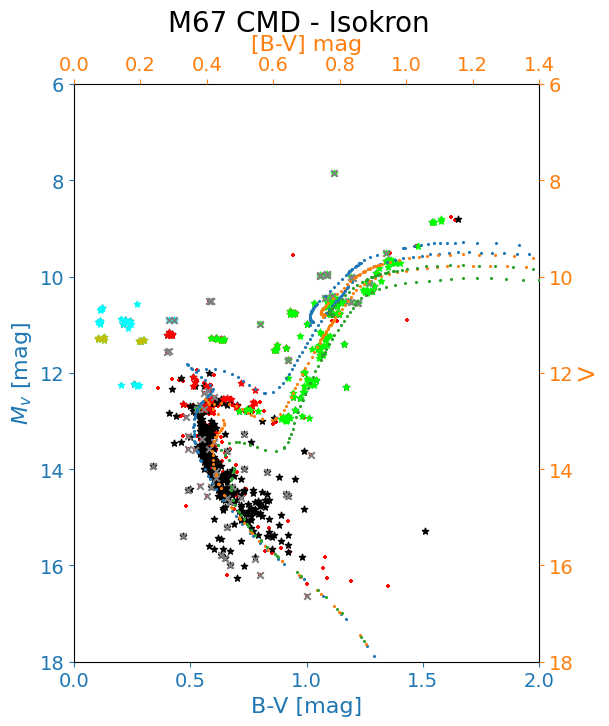

In [47]:
x_values1=BV
y_values1=V

x_values2=Bm
y_values2=Vm

fig=plt.figure(figsize=(6,7.5))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

plt.suptitle("M67 CMD - Isokron", fontsize=20)
ax.scatter(BV, V, s=8, color='r', marker="+")
ax.scatter(BV_361, V_361, s=22, color='k', marker="*", label="ref : 1367")
#ax.set_suptitle("M21 HR Diagram")
ax.set_xlabel("B-V [mag]", color="C0")
ax.set_ylabel(r"$M_v$ [mag]", color="C0")
ax.scatter(BS["BV"], BS["V"], s=22, color='cyan', marker="*", label="Blue Stragglers")
ax.scatter(SB["BV"], SB["V"], s=22, color='r', marker="*", label="Spectroscopic Binaries")
ax.scatter(Am["BV"], Am["V"], s=22, color='y', marker="*", label="Am stars")
ax.scatter(gK["BV"], gK["V"], s=22, color='lime', marker="*", label="Red Giant")
ax.scatter(NM["BV"], NM["V"], s=22, color='grey', marker="x", label="Non Member")
ax.set_xlim(0, 2)
ax.set_ylim(6, 18)
#ax.set_xlabel("(B-V)", color="C0")
#ax.set_ylabel("V", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.invert_yaxis()

#ax2.scatter(x_values2-y_values2, y_values2, color="C1", s=2)
ax2.scatter((zini6c['Bm']-zini6c['Vm']), zini6c['Vm']+10.4, s=2,  marker="*")
ax2.scatter((zini6d['Bm']-zini6d['Vm']), zini6d['Vm']+10.4, s=2, marker="*")
ax2.scatter((zini6e['Bm']-zini6e['Vm']), zini6e['Vm']+10.4, s=2,  marker="*")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylim(6, 18)
ax2.set_xlim(0, 1.4)
ax2.set_xlabel(r'[B-V] mag', color="C1")
ax2.set_ylabel(r'V', color="C1")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.invert_yaxis()

##**Pembahasan**

###**Plot CMD**
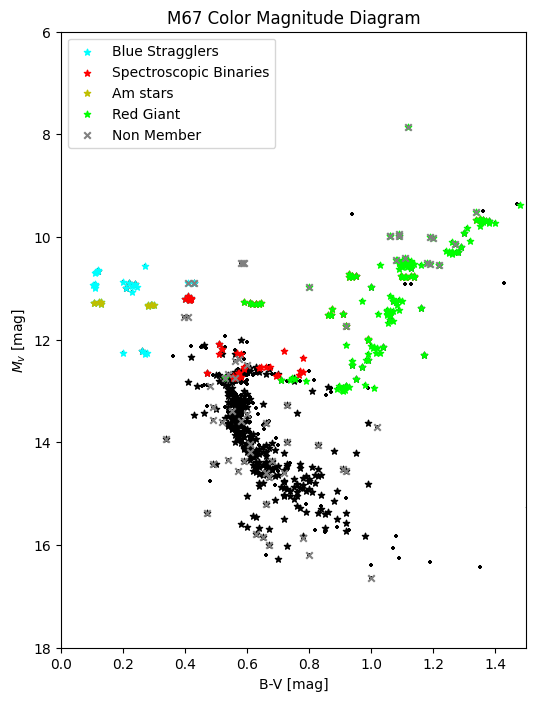

###**Plot CMD fitting**

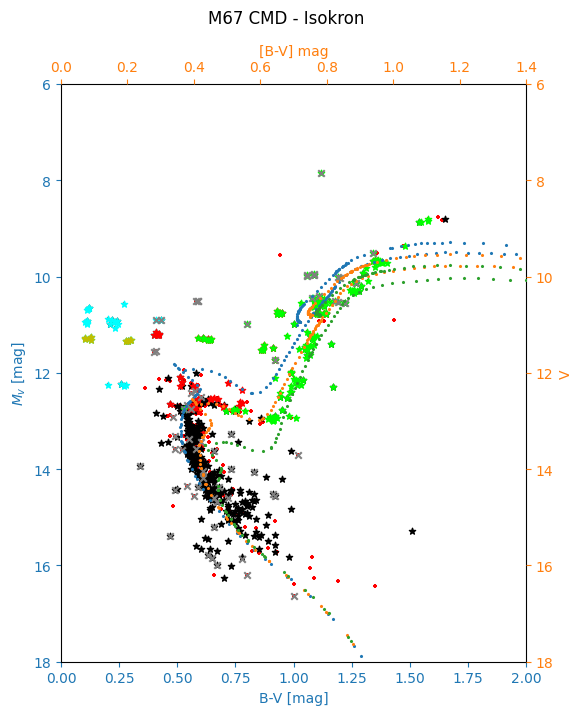

###**Nilai Jarak, Usia dan metalisitas**
Dari model isokron yang telah dibuat, yang paling fit dengan CMD adalah Isokron dengan **logAge = 9.509**, **Zini = 0.78**, dan modulus jarak **Modulus Jarak = 10.4**